# **AP155 Lab Assignment** 
## Module 5: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 3 are worth 25, 25, and 50 points, respectively).

_Due Date_: **5PM of December 7 (Tue)**


### Student Information 

_Full Name (Last Name, First Name)_: Cagas, Jethro Francis\
_Student No._: 2018-02343\
_Section_: HX4

### Submission Information

_Date and Time Submitted (most recent upload)_: 

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:Jethro Francis Cagas** 

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/25
* Problem 2 - []/25
* Problem 3 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (25 pts.; 50/50 for code & discussion) 
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits. 

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(15 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$. 

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(10 pts.)*

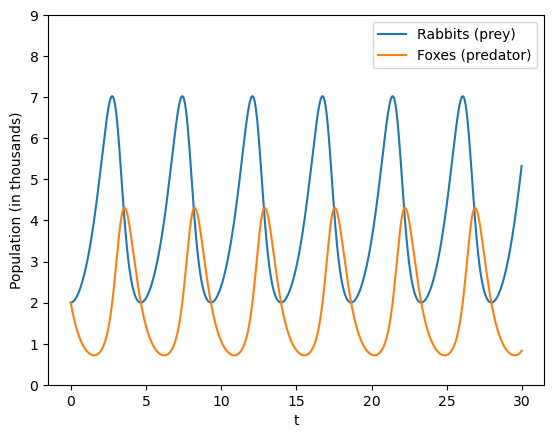

In [2]:
from math import sin
from numpy import array, arange
from pylab import plot, xlabel, ylabel, show
import matplotlib.pyplot as plt

# Define the Function
def f(r,t):
    x = r[0]
    y = r[1]
    fx = alpha*x - beta*x*y
    fy = gamma*x*y - sigma*y
    return array([fx,fy], float)

# Initial Values for the Variables
a = 0.0
b = 30.0
N = 1000
h = (b-a)/N
alpha = 1
beta = 0.5
gamma = 0.5
sigma = 2

# Setup Arrays
tpoints = arange(a,b,h)
xpoints = []
ypoints = []

# Fourth-order Runge-Kutta Method
r = array([2,2], float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1, t+0.5*h)
    k3 = h*f(r+0.5*k2, t+0.5*h)
    k4 = h*f(r+k3, t+h)
    r += (k1+2*k2+2*k3+k4)/6

# Plot the Functions
plt.plot(tpoints, xpoints, label='Rabbits (prey)')
plt.plot(tpoints, ypoints, label='Foxes (predator)')
plt.ylabel ("Population (in thousands)")
plt.xlabel ("t")
plt.legend()
plt.ylim(0, 9)
plt.show()

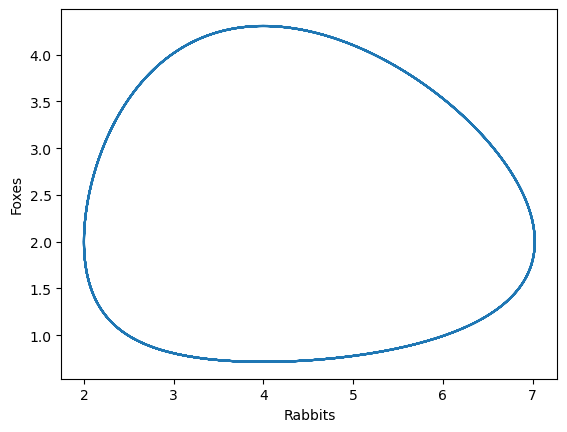

In [3]:
plot(xpoints, ypoints)
xlabel("Rabbits")
ylabel("Foxes")
show()

### PROBLEM 2 (25 pts.; 50/50 for code & discussion)

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(15 pts.)*

2. Make a graph of $\theta$ as a function of time. *(10 pts.)*


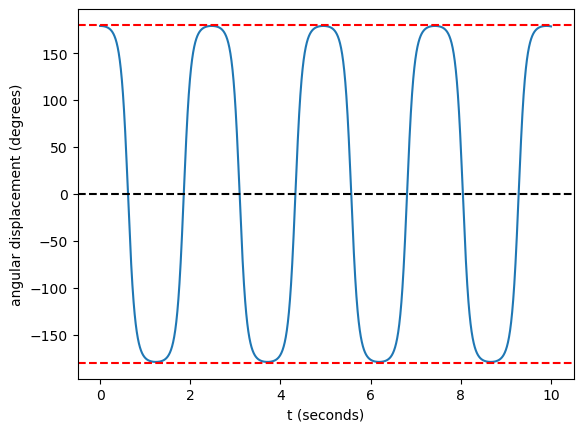

In [4]:
from math import sin, pi
from numpy import array, arange
from pylab import plot, xlabel, ylabel, show
import math
import matplotlib.pyplot as plt

g = 9.81
l = 0.1

# Define Function
def f(r,t):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l)*sin(theta)
    return array([ftheta,fomega], float)

a = 0.0
b = 10
N = 3000
h = (b-a)/N

# Setup Arrays
tpoints = arange(a,b,h)
xpoints = []
ypoints = []

# Fourth-order Runge-Kutta Method
r = array([179*pi/180,0], float)
for t in tpoints:
    xpoints.append(r[0]*180/pi)
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1, t+0.5*h)
    k3 = h*f(r+0.5*k2, t+0.5*h)
    k4 = h*f(r+k3, t+h)
    r += (k1+2*k2+2*k3+k4)/6

fig, ax = plt.subplots()
ax.plot(tpoints, xpoints)
xlabel ("t (seconds)")
ylabel ("angular displacement (degrees)")
ax.axhline(y=0, color='k', ls="--")
ax.axhline(y=180, color='r', ls="--")
ax.axhline(y=-180, color='r', ls="--")
show()


### PROBLEM 3 (50 pts.; 50/50 for code & discussion)

**Quantum Oscillators**

_Refer to Exercise 8.14 of the Newman text_ Consider the one-dimensional, time-independent Schrodinger equation in a harmonic (i.e., quadratic) potential $V(x) = V_0 x^2 / a^2$, where $V_0$ and $a$ are constants. 

1. Modify the code from Example 8.9 to find the energies of the ground state and the first two excited states for this potential when $m$ is the electron mass, $V_0 = 50$ eV, and $a = 10^{-11}$ m. Note that in theory the wavefunction goes all the way out to $x = \pm \infty$, but you can get good answers by using a large but finite interval. Try using $x = - 10a$ to $+10a$, with the wavefunction $\psi = 0$ at both boundaries. (In effect, you are putting the harmonic oscillator in a box with impenetrable walls.) The wavefunction is real everywhere, so you don't need to use complex variables, and you can use evenly spaced points for the solution-- there is no need to use an adaptive method for this problem.

   The quantum harmonic oscillator is known to have energy states that are equally spaced. Check that this is true, to the precision of your calculation, for your answers. (Hint: The ground state has energy in the range 100 to 200eV.) *(20 pts.)*

2. Modify the code from (1) to calculate the same three energies for the anharmonic oscillator with $V(x) = V_0 x^4 /a^4$, with the same parameter values. *(10 pts.)*

3. Calculate the properly normalized wavefunctions of the anharmonic oscillator for the three states. To normalize the wavefunctions you will have to calculate the value of the integral $\int_{-\infty}^{+\infty} |\psi(x)|^2 {\rm d}x$ and then rescale $\psi$ appropriately to ensure that the area under the square of each of the wavefunctions is 1. Either the trapezoidal rule or Simpson's rule will give you a reasonable value for the integral. *(15 pts.)*

   Note that you may find a few very large values at the end of the array holding the wavefunction. Where do these large values come from? Are they real, or spurious? One simple way to deal with the large values is to make use of the fact that the system is symmetric about its midpoint and calculate the integral of the wavefunction over only the left-hand half of the system, then double the result. This neatly misses out the large values. 

4. Make a plot of the normalized wavefunctions from (3), all on the same axes, as a function of $x$ over a modest range near the origin-- say $x = -5a$ to $x =+5a$. *(5 pts.)*



ground state = 100 something

In [127]:
import numpy as np
from numpy import array, arange
import matplotlib.pyplot as plt

# Constants
m = 9.1094e-31   # Mass of electron
hbar = 1.054e-34 # Planck's constant over 2*pi
e = 1.6022e-19   # Electron Charge
L = 5.2918e-11   # Bohr radius
N = 1000
h = L/N

# Potential Function
V0 = 50*e
a = 10**(-11)

def V1(x):
    return (V0*x**2)/(a**2)

# Shrodinger's Equation
def f(r, x, E, V):
    psi = r[0]
    phi = r[1]
    fpsi = phi
    fphi = (2*m/hbar**2)*(V(x)-E)*psi
    return array ([fpsi, fphi], float)


# Calculate the wavefunction for a particular energy 
def solve(E, V):
    psi = 0.0
    phi = 1.0
    r = array([psi, phi], float)
    
    for x in arange(-10*a,10*a,h): # From x=-10a to x=10a
        k1 = h*f(r,x,E,V)
        k2 = h*f(r+0.5*k1, x+0.5*h, E, V)
        k3 = h*f(r+0.5*k2, x+0.5*h, E, V)
        k4 = h*f(r+k3, x+h, E, V)
        r += (k1+2*k2+2*k3+k4)/6

    return r[0]


# Main program to find the energy using the secant method

E1 = 0
E2 = e
psi2 = solve(E1, V1)
# psi_val = []

target = e/1000
while abs(E1-E2)>target:
    psi1, psi2 = psi2,solve(E2,V1)
    E1, E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)
    
print("Ground State E =", E2/e, "eV")

# Calculate the wavefunction for a particular energy (1st Excited State)
def solve(E, V):
    psi = 0
    phi = 1
    r = array([psi, phi], float)
    
    for x in arange(-10*a,0,h): # From x=-10a to x = 0 (since at the highest energy level is at x=0)
        k1 = h*f(r,x,E,V)
        k2 = h*f(r+0.5*k1, x+0.5*h, E, V)
        k3 = h*f(r+0.5*k2, x+0.5*h, E, V)
        k4 = h*f(r+k3, x+h, E, V)
        r += (k1+2*k2+2*k3+k4)/6
    
    return r[0]


# Main program to find the energy using the secant method

E1 = 0
E2 = e
psi2 = solve(E1, V1)
# psi_val = []

target = e/1000
while abs(E1-E2)>target:
    psi1, psi2 = psi2,solve(E2,V1)
    E1, E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)
    
print("First Excited State E =", E2/e, "eV")

Ground State E = 137.94544445181177 eV
First Excited State E = 413.5549138714772 eV


In [189]:
import numpy as np
from numpy import array, arange
import matplotlib.pyplot as plt

# Constants
m = 9.1094e-31   # Mass of electron
hbar = 1.054e-34 # Planck's constant over 2*pi
e = 1.6022e-19   # Electron Charge
L = 5.2918e-11   # Bohr radius
N = 1000
h = L/N

# Potential Function
V0 = 50*e
a = 10**(-11)

def V1(x):
    return (V0*x**4)/(a**4)

# Shrodinger's Equation
def f(r, x, E, V):
    psi = r[0]
    phi = r[1]
    fpsi = phi
    fphi = (2*m/hbar**2)*(V(x)-E)*psi
    return array ([fpsi, fphi], float)


# Calculate the wavefunction for a particular energy 
def solve(E, V):
    psi = 0.0
    phi = 1.0
    r = array([psi, phi], float)
    
    for x in arange(-10*a,10*a,h): # From x=-10a to x=10a
        k1 = h*f(r,x,E,V)
        k2 = h*f(r+0.5*k1, x+0.5*h, E, V)
        k3 = h*f(r+0.5*k2, x+0.5*h, E, V)
        k4 = h*f(r+k3, x+h, E, V)
        r += (k1+2*k2+2*k3+k4)/6

    return r[0]


# Main program to find the energy using the secant method

E1 = 0
E2 = e
psi2 = solve(E1, V1)
psi_vals_1 = []

target = e/1000
while abs(E1-E2)>target:
    psi_vals_1.append(psi1)
    psi1, psi2 = psi2,solve(E2,V1)
    E1, E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)
    

print("Ground State E =", E2/e, "eV")

# Calculate the wavefunction for a particular energy (1st Excited State)
def solve(E, V):
    psi = 0
    phi = 1
    r = array([psi, phi], float)
    
    for x in arange(-10*a,0,h): # From x=-10a to x = 0 (since at the highest energy level is at x=0)
        k1 = h*f(r,x,E,V)
        k2 = h*f(r+0.5*k1, x+0.5*h, E, V)
        k3 = h*f(r+0.5*k2, x+0.5*h, E, V)
        k4 = h*f(r+k3, x+h, E, V)
        r += (k1+2*k2+2*k3+k4)/6
    
    return r[0]


# Main program to find the energy using the secant method

E1 = 0
E2 = e
psi2 = solve(E1, V1)
psi_vals_2 = []

target = e/1000
while abs(E1-E2)>target:
    psi_vals_2.append(psi1)
    psi1, psi2 = psi2,solve(E2,V1)
    E1, E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)
    
print("First Excited State E =", E2/e, "eV")

# Calculate the wavefunction for a particular energy (2nd Excited State)
def solve(E, V):
    psi = 0
    phi = 1
    r = array([psi, phi], float)
    
    for x in arange(0, L, h): 
        k1 = h*f(r,x,E,V)
        k2 = h*f(r+0.5*k1, x+0.5*h, E, V)
        k3 = h*f(r+0.5*k2, x+0.5*h, E, V)
        k4 = h*f(r+k3, x+h, E, V)
        r += (k1+2*k2+2*k3+k4)/6
    
    return r[0]


# Main program to find the energy using the secant method

E1 = 0.0
E2 = e
psi2 = solve(E1, V1)
psi_vals_3 = []

target = e/1000
while abs(E1-E2)>target:
    psi_vals_3.append(psi1)
    psi1, psi2 = psi2,solve(E2,V1)
    E1, E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)
    
print("Second Excited State E =", E2/e, "eV")

Ground State E = 205.15117629338485 eV
First Excited State E = 734.2847009828923 eV
Second Excited State E = 735.133214008234 eV


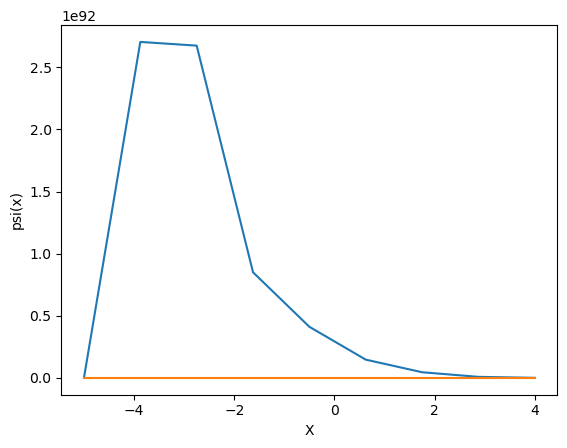

In [198]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.linspace(-5,4,9)
plt.plot(xpoints, psi_vals_1)
#plt.plot(xpoints, psi_vals_2)
plt.plot(xpoints, psi_vals_3)
plt.xlabel("X")
plt.ylabel("psi(x)")

plt.show()